# <p style="color:hotpink">**AI for Attendance: Exploratory Data Analysis (EDA)**

This notebook performs exploratory data analysis and early machine learning modeling on a synthetic dataset simulating maternal telehealth appointments. It explores patient characteristics, visit types, payer mix, and appointment outcomes (Show, No-Show, Cancelled, Scheduled), Visualizations include bar charts, pie charts, histograms, rolling trends, and a word cloud of patient messages.

In the second half, the notebook develops and evaluates Random Forest models to:
1. Predict no-show risk for completed appointments.
2. Identify patients likely to ignore outreach attempts.
3. Estimate future no-show probability for upcoming scheduled visits.

These insights aim to support smarter patient engagement, resource allocation, and appointment management in virtual maternal care settings.

---

## <p style="color:hotpink">**Load the dataset**

Read in the cleaned synthetic dataset simulating maternal telehealth appointments. This dataset includes patient demographics, appointment details, communication attempts, and outcomes (e.g., Show, No-Show).


In [1]:
# Import CSV file and create DataFrame
import pandas as pd

df = pd.read_csv("maternal_telehealth_data_clean.csv", keep_default_na=False)
df.head(20)

,patient_id,patient_name,patient_age,zip_code,insurance,referral_source,visit_type,booking_days_prior,confirmed_2_days_prior,ignored_all_outreach,past_visits,past_no_shows,credit_card_on_file,baby_age_months,status,patient_message,message_intent,stress_level,message_length
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Courtney Doyle,32,95544,Major Insurance,Provider Referred,New Patient Postpartum,1,False,True,3,0,False,10.0,Show,None,None,None,0
1,16419f82-8b9d-4434-a465-e150bd9c66b3,Amanda Davis,21,55477,Major Insurance,Provider Referred,New Patient Prenatal,11,False,True,5,0,False,0.0,Show,None,None,None,0
2,8fadc1a6-06cb-4fb3-9a1d-e644815ef6d1,Marie Gardner,30,32906,Major Insurance,Provider Referred,New Patient Prenatal,17,False,True,2,0,True,0.0,Show,None,None,None,0
3,cf36d58b-4737-4190-96da-1dac72ff5d2a,Olivia Moore,23,85866,Major Insurance,Provider Referred,New Patient Prenatal,3,True,False,0,0,True,0.0,Show,None,None,None,0
4,371ecd7b-27cd-4130-8722-9389571aa876,Gabrielle Davis,32,70199,Major Insurance,DME Referred,Regular Care,0,False,True,2,0,False,8.0,Cancelled,None,None,None,0
5,9a8dca03-580d-4b71-98f5-64135be6128e,Amanda Stevens,19,63512,Major Insurance,DME Referred,New Patient Postpartum,18,True,False,1,0,True,9.0,Show,None,None,None,0
6,142c3fe8-60e7-4113-ac1b-8ca1f91e1d4c,Sandra Montgomery,25,36768,Major Insurance,DME Referred,Regular Care,15,True,False,2,0,False,11.0,Show,None,None,None,0
7,b45ed1f0-3139-432c-93cd-59bf5c941cf0,Mary Mejia,33,35167,Major Insurance,Provider Referred,Regular Care,5,False,True,2,0,True,17.0,Show,None,None,None,0
8,19db3ad0-ddd1-4fb2-bb98-2ef8daf61a26,Jody Flowers,19,46334,Major Insurance,DME Referred,Regular Care,12,True,False,5,0,True,1.0,Show,None,None,None,0
9,ab9099a4-35a2-40ae-9af3-05535ec42e08,Taylor Wong,20,86248,Major Insurance,Provider Referred,Regular Care,30,True,False,2,0,False,3.0,Show,None,None,None,0


## <p style="color:hotpink">**Explore Categorical Features**

Visualize the distributions of key categorical variables:
- **Insurance Type**
- **Visit Type**
- **Referral Source**

These help reveal patient mix and service access patterns.

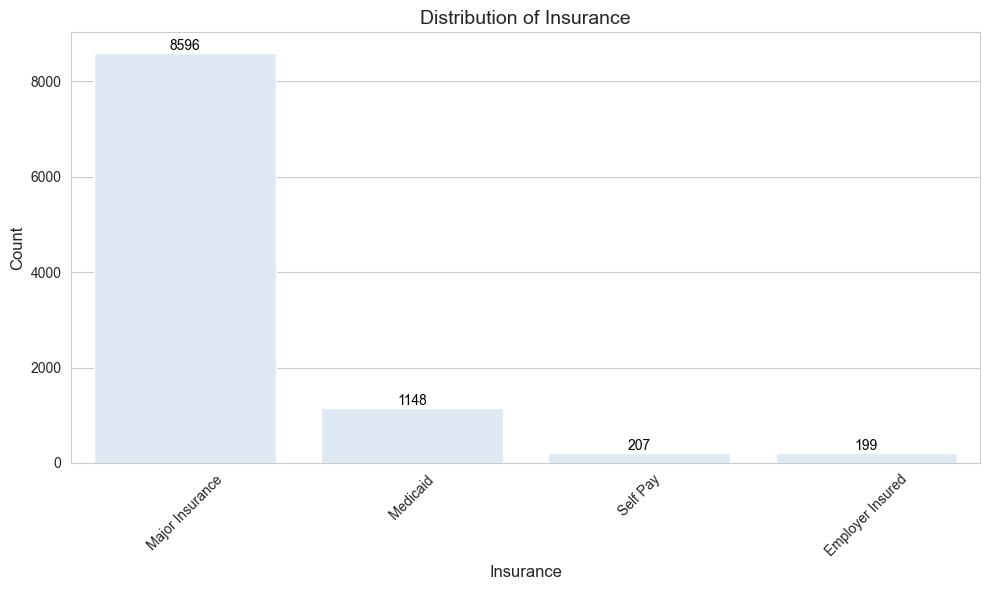

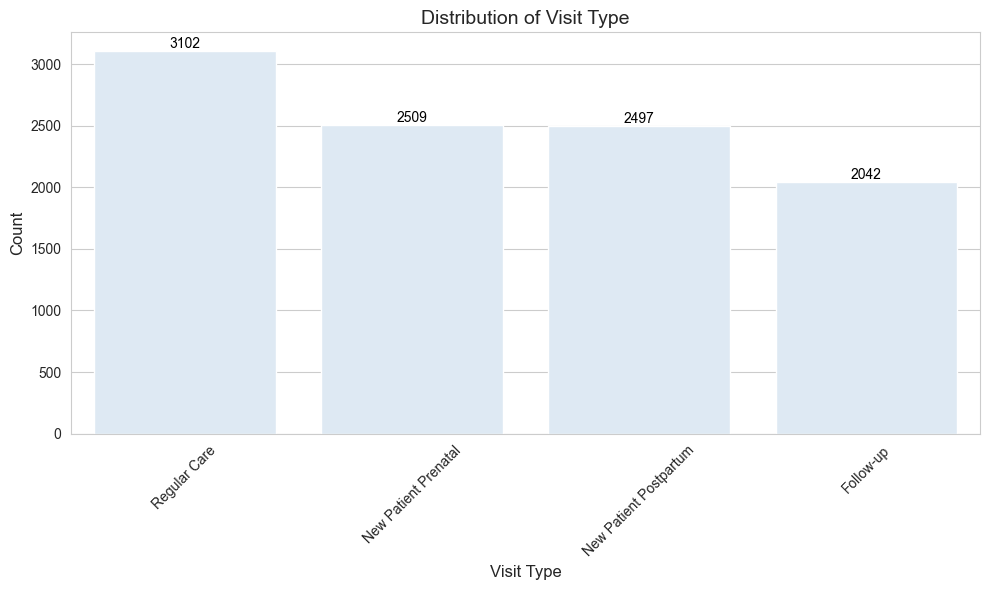

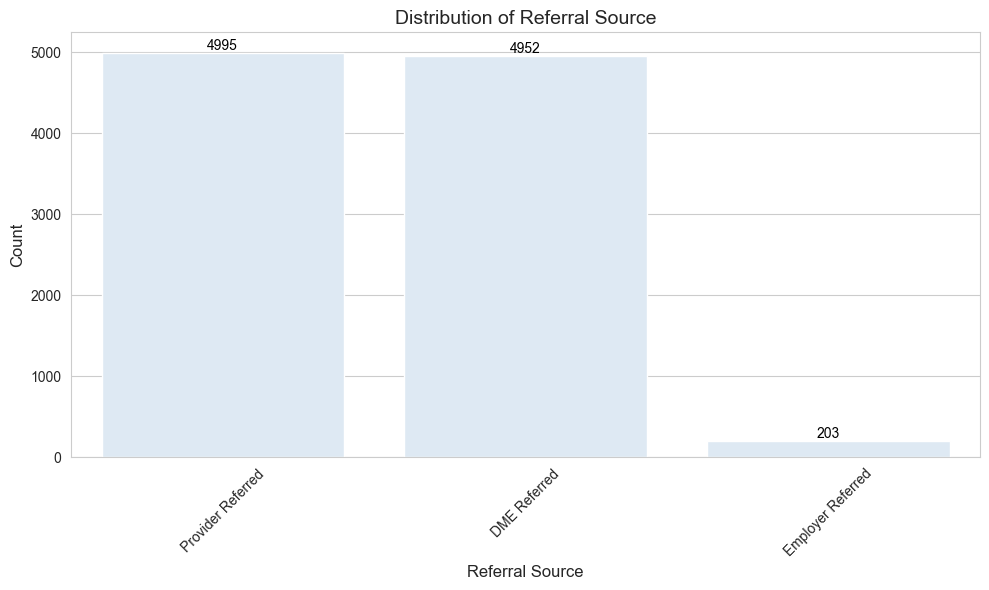

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply styling for consistency
sns.set_style("whitegrid")
sns.set_palette("Blues")

categorical_cols = ['insurance', 'visit_type', 'referral_source']
for col in categorical_cols:
    plt.figure(figsize=(10,6))
    
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Add count labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        label = f'{int(height)}'
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')
    
    plt.show()

## <p style="color:hotpink">**Insurance Mix Breakdown**

A pie chart to visualize the relative proportions of patients by insurance type. Helpful for identifying high-volume payers or underserved segments.

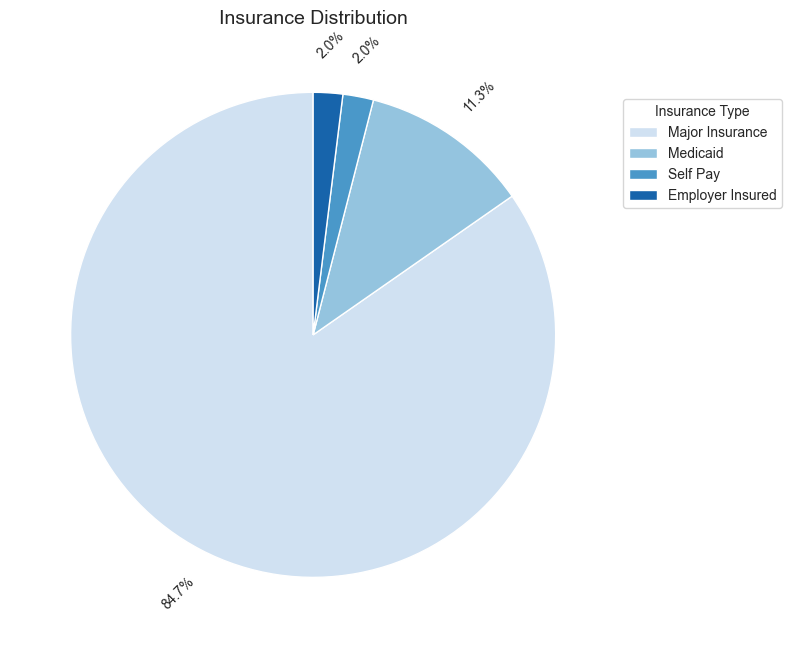

In [3]:
# Pie Chart
counts = df['insurance'].value_counts()
labels = counts.index.tolist()
sizes = counts.values.tolist()
colors = sns.color_palette("Blues", n_colors=len(labels))

# Create figue and pie chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=1.2,
    labeldistance=0.9,
    textprops={'fontsize': 10}
)

for autotext in autotexts:
    autotext.set_rotation(45)

# Add legend
ax.legend(wedges, labels, loc='upper left', bbox_to_anchor=(1, 0.9), title="Insurance Type")

plt.title('Insurance Distribution', fontsize=14)
plt.tight_layout()
plt.show()

## <p style="color:hotpink">**Distribution of Numeric Variables**

Histograms for:
- **Baby age (in months)**
- **Booking lead time (days before appointment)**

Includes KDE overlay for smoother trend visualization.

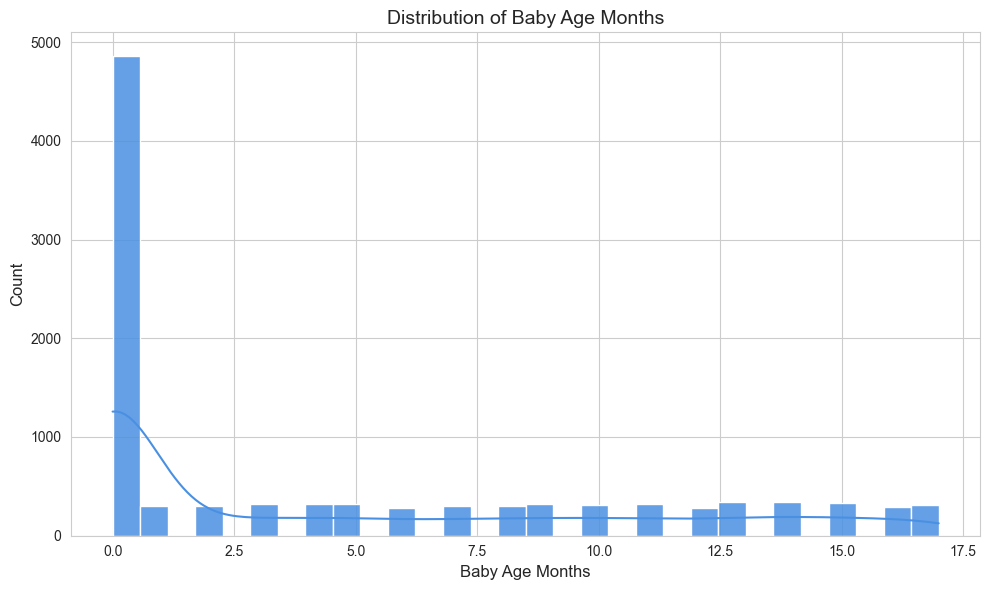

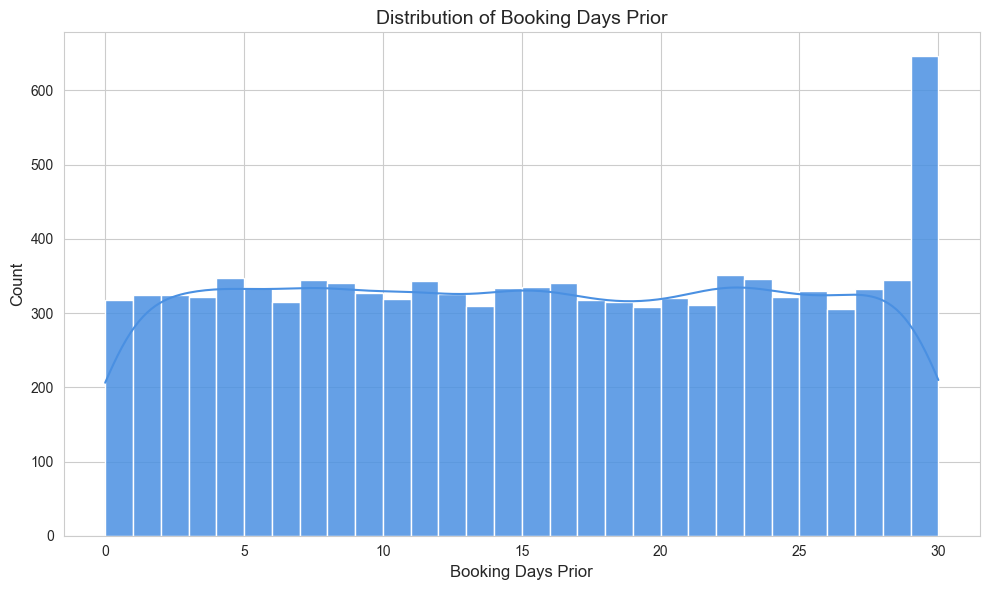

In [4]:
# Histogram

# Set style
sns.set_palette("Blues")
sns.set_style("whitegrid")

numeric_cols = ['baby_age_months', 'booking_days_prior']
for col in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(
        data=df,
        x=col,
        bins=30,
        kde=True,
        color="#4A90E2",  # Soft Blue
        edgecolor=None,   # No black edges
        alpha=0.85
    )
    plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

## <p style="color:hotpink">**Appointment Outcomes**

Bar chart showing the distribution of appointment statuses:
- Show
- No-Show
- Cancelled
- Scheduled

This provides a baseline for class balance and outcome analysis.

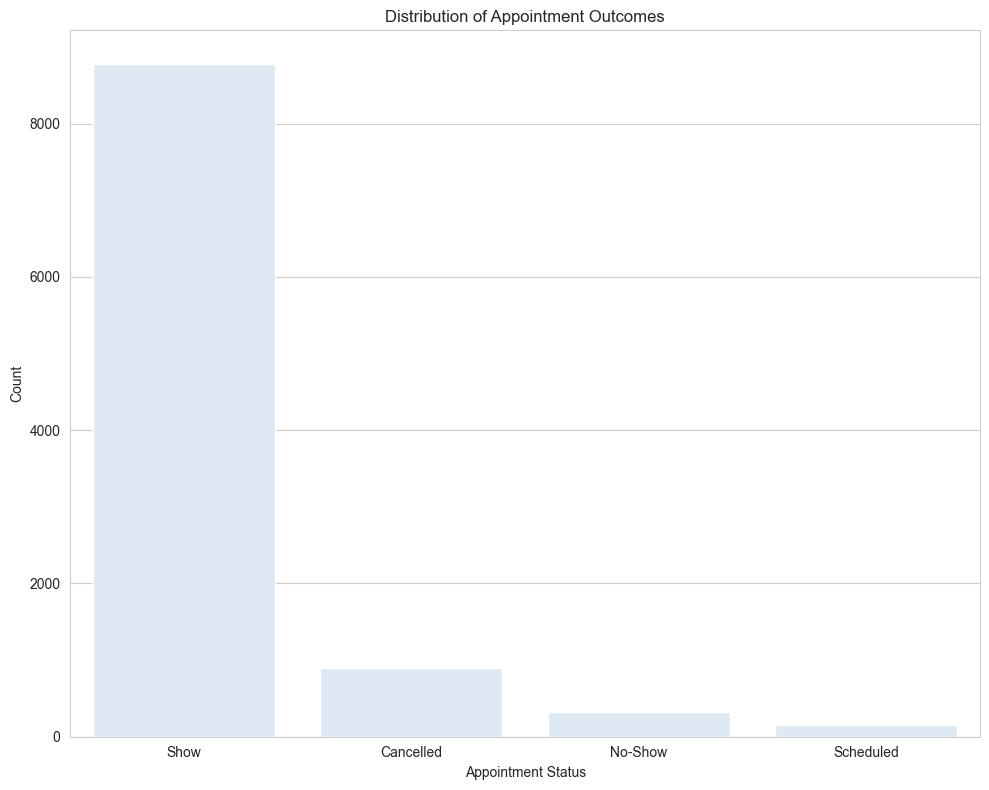

In [5]:
# Bar Plot of Appointment Outcomes

# Apply styling
sns.set_style("whitegrid")
sns.set_palette("Blues")

# Bar plot of appoint outcomes 

plt.figure(figsize=(10,8))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index)
plt.title('Distribution of Appointment Outcomes')
plt.ylabel('Count')
plt.xlabel('Appointment Status')
plt.tight_layout()
plt.show()

## <p style="color:hotpink">**Rolling Outcome Rates Over Time**

Simulate a time-ordered view of patient behavior using appointment order as a proxy for time. Plot rolling averages for:
- No-Shows
- Shows
- Cancellations
- Scheduled

This helps visualize behavioral trends and seasonality patterns.

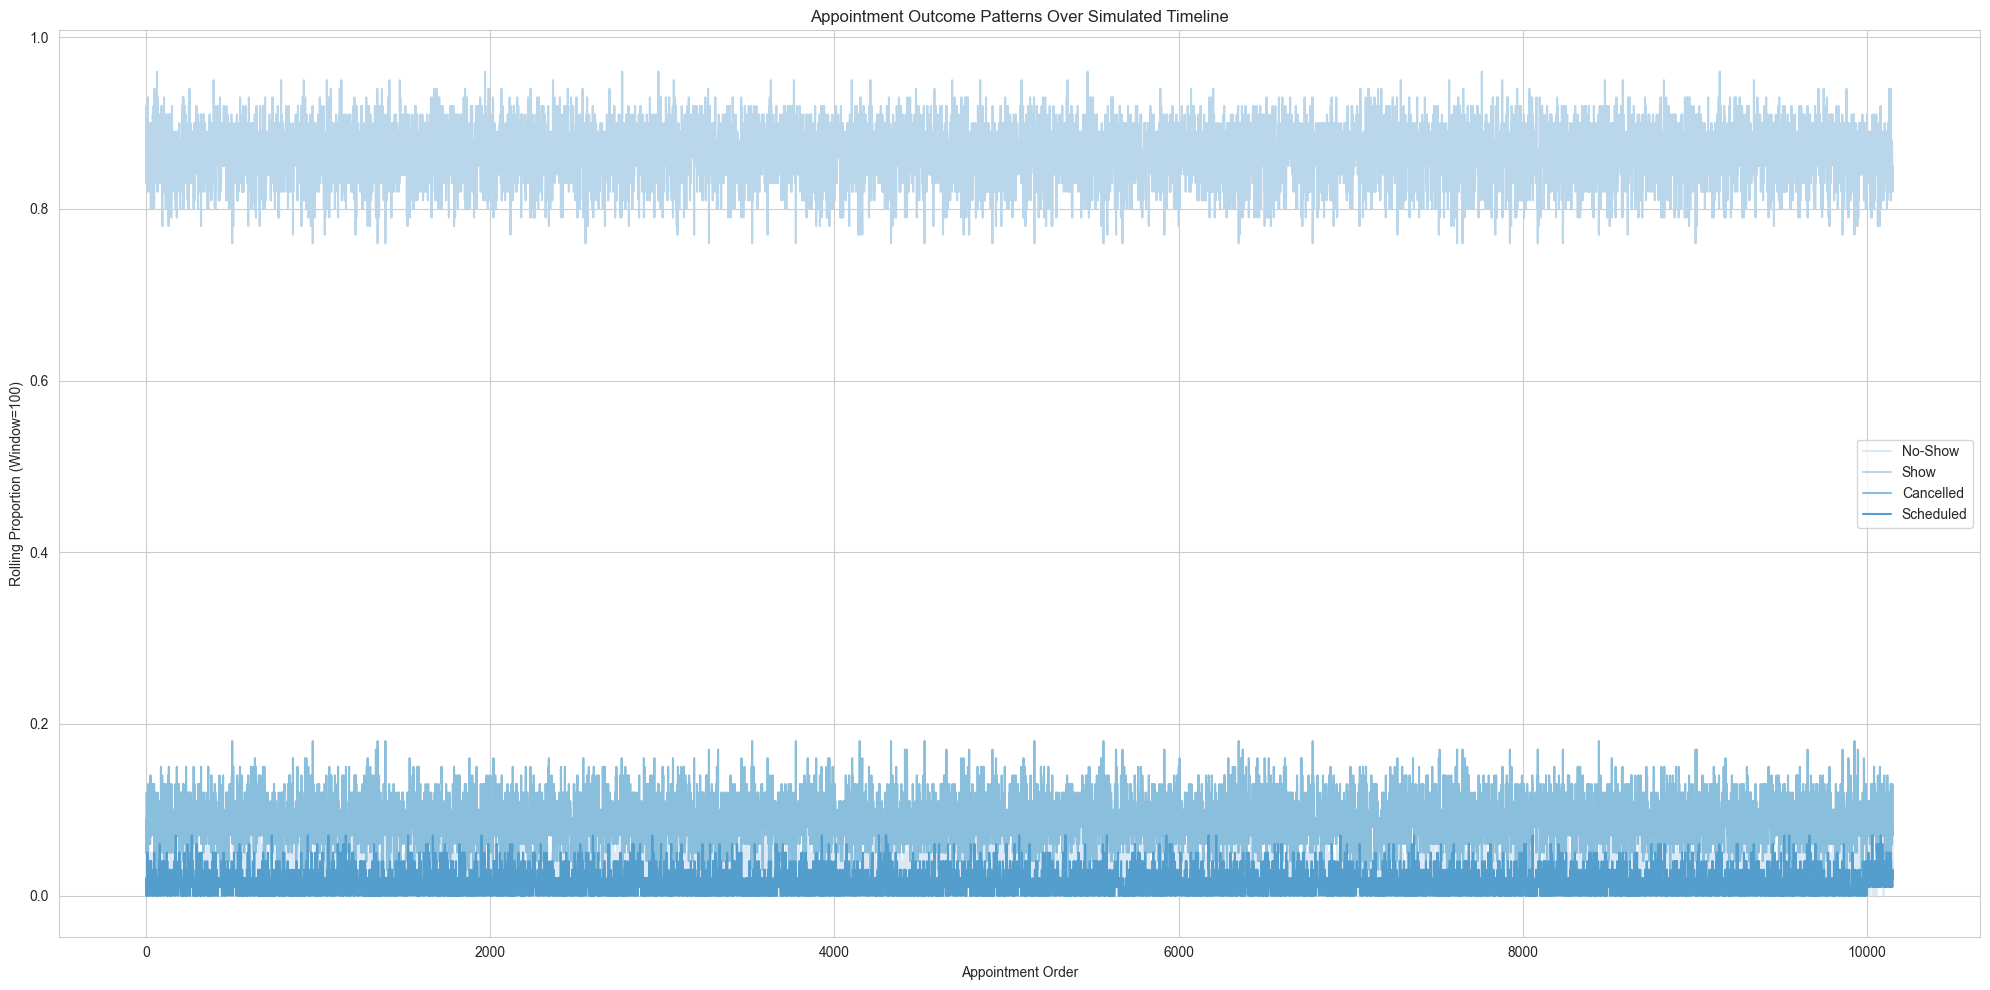

In [ ]:
# Sort by ID or index as proxy for time
df_sorted = df.sort_values(by='patient_id') # Can also just 'reset' index

# Rolling average of outcomes over time
df_sorted['rolling_no_show'] = (df_sorted['status'] == 'No-Show').rolling(100).mean()
df_sorted['rolling_show'] = (df_sorted['status'] == 'Show').rolling(100).mean()
df_sorted['rolling_cancelled'] = (df_sorted['status'] == 'Cancelled').rolling(100).mean()
df_sorted['rolling_scheduled'] = (df_sorted['status'] == 'Scheduled').rolling(100).mean()

plt.figure(figsize=(20,10))
sns.lineplot(data=df_sorted['rolling_no_show'], label='No-Show')
sns.lineplot(data=df_sorted['rolling_show'], label='Show')
sns.lineplot(data=df_sorted['rolling_cancelled'], label='Cancelled')
sns.lineplot(data=df_sorted['rolling_scheduled'], label='Scheduled')
plt.title('Appointment Outcome Patterns Over Simulated Timeline')
plt.xlabel('Appointment Order')
plt.ylabel('Rolling Proportion (Window=100)')
plt.legend()
plt.tight_layout()
plt.show()

## <p style="color:hotpink">**Data Completeness & Uniqueness**

Two visual checks:
- Count of non-null values per column
- Count of unique values per column

Useful for spotting missing data issues or low-variance features.

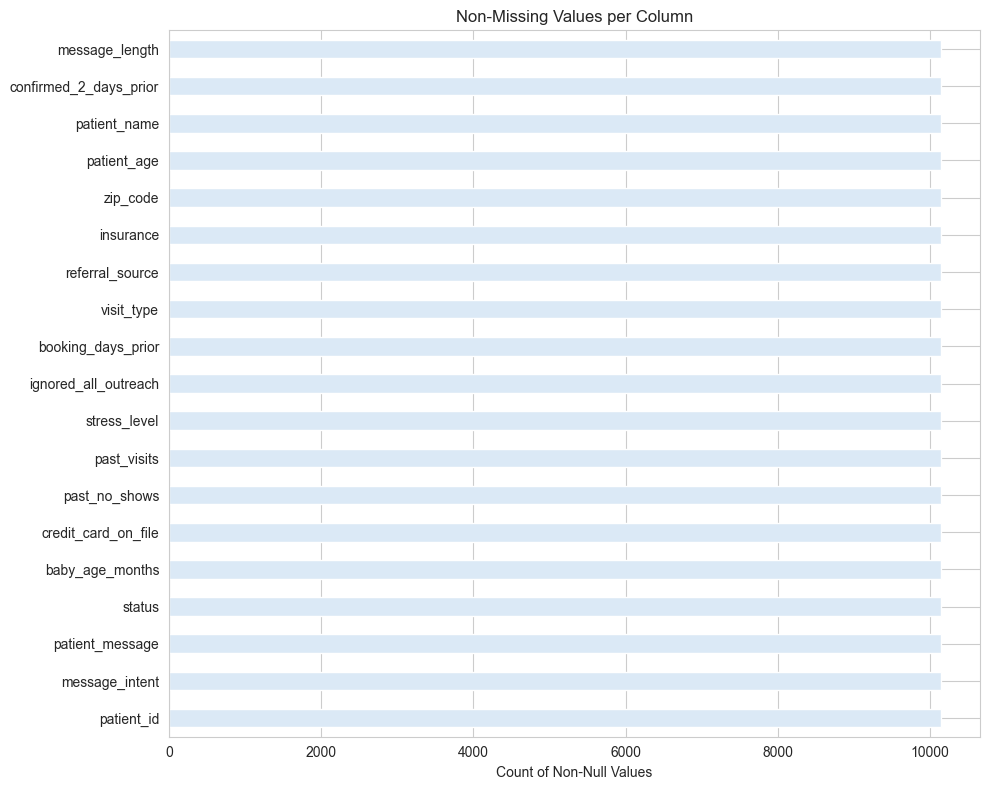

In [7]:
# Data Completeness Check
df.notnull().sum().sort_values().plot(kind='barh', figsize=(10,8))
plt.title("Non-Missing Values per Column")
plt.xlabel("Count of Non-Null Values")
plt.tight_layout()
plt.show()

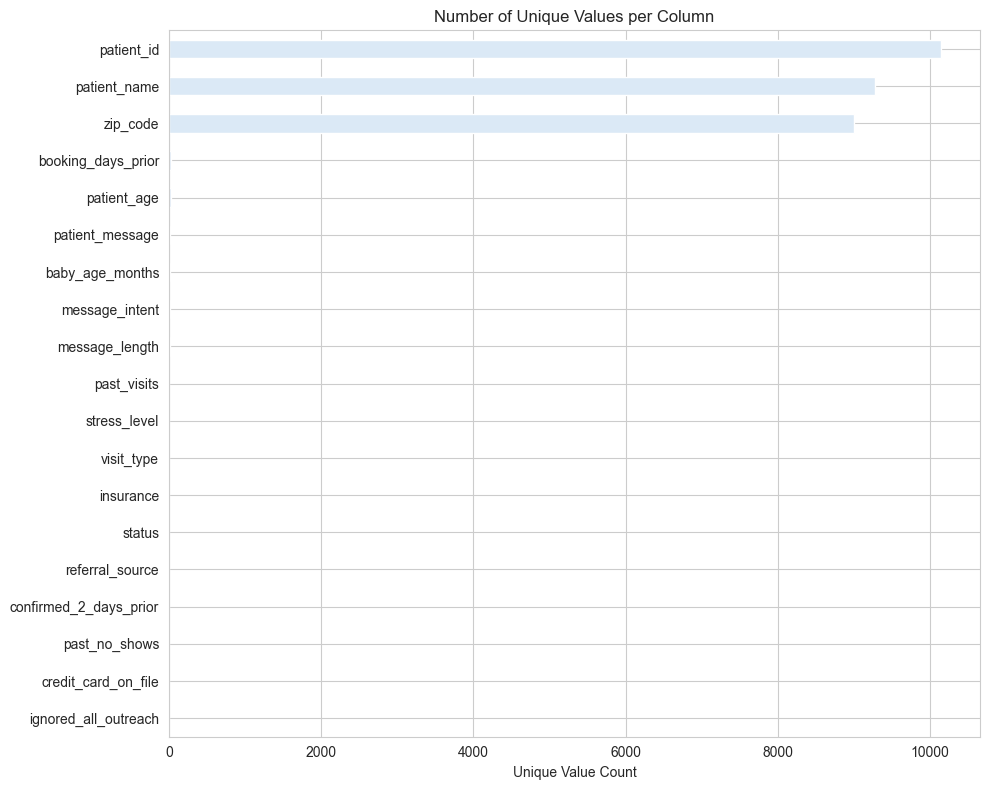

In [8]:
# Unique Value Coverage
df.nunique().sort_values().plot(kind='barh', figsize=(10,8))
plt.title("Number of Unique Values per Column")
plt.xlabel("Unique Value Count")
plt.tight_layout()
plt.show()

## <p style="color:hotpink">**Feature Correlations**

Correlation heatmap of numeric features to identify multicollinearity or relationships between key variables.

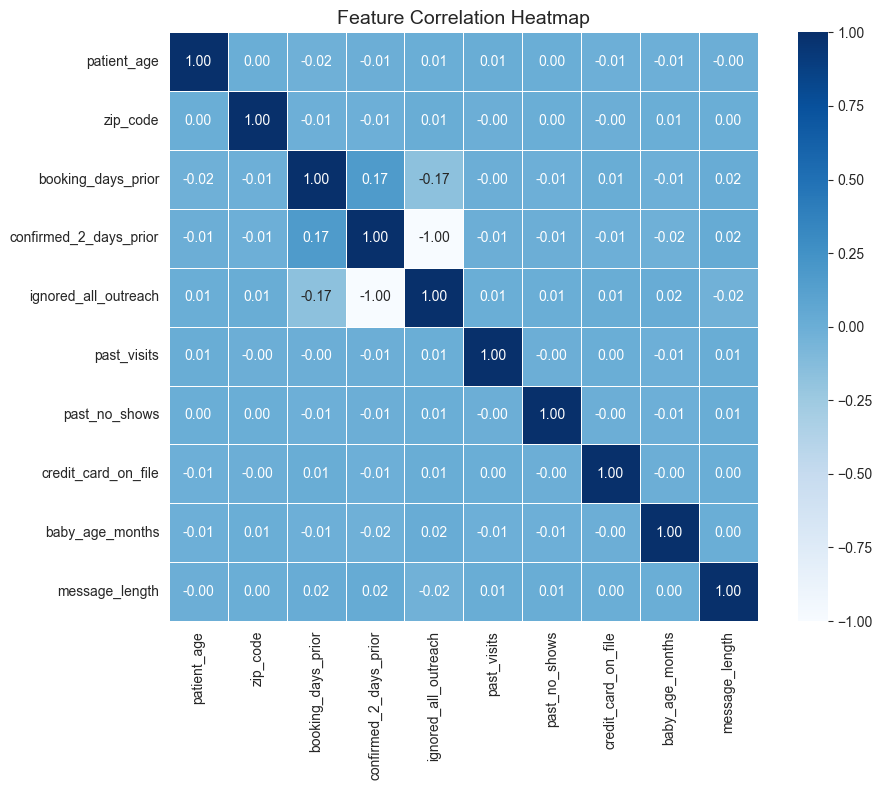

In [9]:
# Heatmap of Feature Correlations
plt.figure(figsize=(10,8))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar=True,
    square=True,
    linewidths=0.5,
    linecolor='white'
)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

## <p style="color:hotpink">**Common Words in Patient Messages**

Generate a word cloud using patient-submitted messages. Provides early NLP insight into frequent language patterns, possible sentiment, or intent.

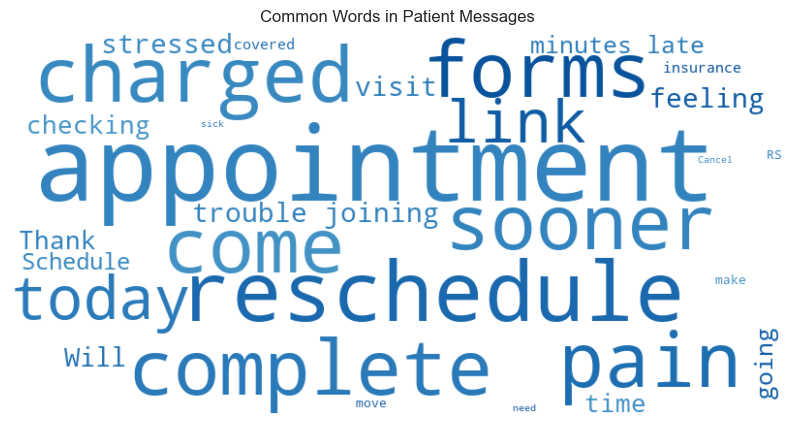

In [10]:
# Word Cloud: Common Words in Message Text
from wordcloud import WordCloud, STOPWORDS
from matplotlib import cm
import random

text = ' '.join(
    df['patient_message']
        .dropna()
        .astype(str)
        .loc[lambda x: x.str.lower() != 'none'] # Removes the string 'None'
)
stopwords = set(STOPWORDS)

# Customer blue color function to match palette
def blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    r, g, b, _ = cm.Blues(random.uniform(0.6, 0.9))
    return (int(r * 255), int(g * 255), int(b * 255))

wordcloud = WordCloud(
    stopwords=stopwords,
    background_color='white',
    max_words=100,
    width=800,
    height=400,
    color_func=blue_color_func
).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Patient Messages')
plt.show()

## <p style="color:hotpink">**Feature Importance from Baseline Model (Random Forest)**

**Reason:** Helps prioritize features before full modeling

Train a basic Random Forest on the full dataset (excluding text and IDs) and plot feature importances to understand which inputs most influence appointment outcomes.


<Axes: >

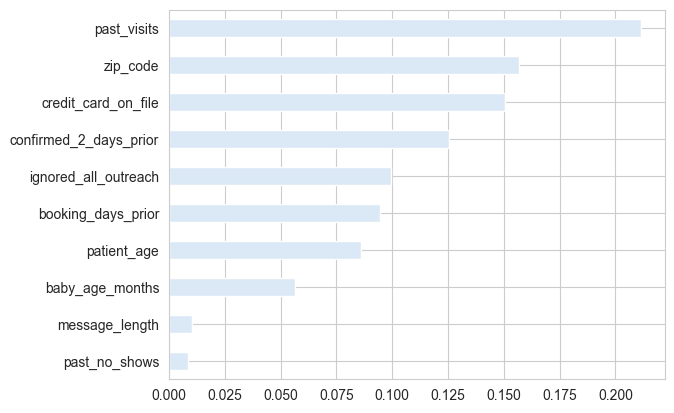

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Drop the original 'status' column from X
X = df.drop(columns=['status', 'patient_id', 'patient_name', 'insurance', 'referral_source', 'visit_type', 'patient_message', 'message_intent', 'stress_level'])
y = df['status']

# Encode the target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Fit model
model = RandomForestClassifier()
model.fit(X, y)

# Plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')

### <p style="color:hotpink">**Model 1: Binary No-Show Prediction**

**Goal:** Build a model to predict whether a patient will not show up for an appointment.

Train/test split using only 'Show' and 'No-Show' data. Build a Random Forest classifier to predict no-show risk based on structured data features.
Evaluate with confusion matrix and classification report.

In [12]:
# Predicting No-Show Risk - Goal: Predict whether a patient will no show their appointment
df_model1 = df[df['status'].isin(['Show', 'No-Show'])].copy()
df_model1['status_binary'] = df_model1['status'].map({'Show': 0, 'No-Show': 1})

# Define X and y
X1 = df_model1.drop(columns=['status', 'patient_id', 'patient_name', 'insurance', 'referral_source', 'visit_type', 'patient_message', 'message_intent', 'stress_level'])
y1 = df_model1['status_binary']

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train model
model1 = RandomForestClassifier()
model1.fit(X1_train, y1_train)

# Predict & evaluate
y1_pred = model1.predict(X1_test)
print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))

[[1756    0]
 [   0   65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1756
           1       1.00      1.00      1.00        65

    accuracy                           1.00      1821
   macro avg       1.00      1.00      1.00      1821
weighted avg       1.00      1.00      1.00      1821



### <p style="color:hotpink">**Model 2: Ignored Outreach Prediction**

**Goal:** Predict whether a patient will require outreach before their appointment.

Predict whether a patient is likely to ignore all outreach attempts (texts, calls, etc). Useful for tailoring communication strategies.

In [14]:
# Predicting Ignored Outreach - Goal: Predict whether a patient will ignore all outreach attempts
X2 = df.drop(columns=[
    'ignored_all_outreach', 'confirmed_2_days_prior', 'status', 'patient_id', 'patient_name', 'insurance', 'referral_source', 'visit_type', 'patient_message', 'message_intent', 'stress_level'])
y2 = df['ignored_all_outreach']

In [15]:
# Split and train
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = RandomForestClassifier()
model2.fit(X2_train, y2_train)

# Predict & evaluate
y2_pred = model2.predict(X2_test)
print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))


[[1392   40]
 [ 454  144]]
              precision    recall  f1-score   support

       False       0.75      0.97      0.85      1432
        True       0.78      0.24      0.37       598

    accuracy                           0.76      2030
   macro avg       0.77      0.61      0.61      2030
weighted avg       0.76      0.76      0.71      2030



### <p style="color:hotpink">**Model 3: Future No-Show Risk for Scheduled Patients**

**Goal:** For patients who are currently scheduled, predict who is likely to no-show using prior data.

Apply a trained model to patients with status "Scheduled" to generate predicted no-show risk scores (probabilities). Helps prioritize proactive engagement efforts.

In [16]:
# Training data
df_train = df[df['status'].isin(['Show', 'No-Show'])].copy()
df_train['status_binary'] = df_train['status'].map({'Show': 0, 'No-Show':1})

X_train = df_train.drop(columns=['status', 'status_binary', 'patient_id'])
y_train = df_train['status_binary']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Drop non-numeric or irrelevant columns from X
X = df.drop(columns=['status', 'patient_id', 'patient_name', 'insurance', 'referral_source', 'visit_type', 'patient_message', 'message_intent', 'stress_level'])
y = df['status']

# Encode the target (status) into numeric labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data for training/testing (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Apply model to "Scheduled" patients

# Filter future appointments
df_scheduled = df[df['status'] == 'Scheduled'].copy()

# Drop same non-numeric columns for future data
X_future = df_scheduled.drop(columns=['status', 'patient_id', 'patient_name', 'insurance', 'referral_source', 'visit_type', 'patient_message', 'message_intent', 'stress_level'])

# Predict no-show risk (probability for class 1)
scheduled_predictions = model.predict_proba(X_future)[:, 1]

# Add predictions back to dataframe
df_scheduled['no_show_risk'] = scheduled_predictions

# View top high-risk patients
df_scheduled[['patient_id', 'no_show_risk']].sort_values(by='no_show_risk', ascending=False).head()


,patient_id,no_show_risk
10073,a001c0a2-dd26-48e8-ba89-bb0c12f2e31f,0.34
10009,8894469d-5228-46b1-a9be-2c5eee0f13a4,0.31
10031,130c7a15-afa4-41a6-a7d0-b36fb2b3eef2,0.21
10012,833ded11-8a62-489f-bc16-63ab009543f5,0.17
10097,1ed1b9b0-ae62-4e9e-ae39-fdc795a51e98,0.17
